#Tugas Akhir Data Mining : Customer Personality Analysis

##Import Packages yang Akan Digunakan

1. pandas
2. matlplotlib.pyplot dan seaborn
3. numpy
4. sklearn

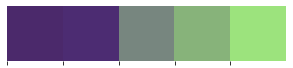

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
colors_nude = ['#4b296b','#4c2c72','#77867f','#87b37a','#9ce37d']
sns.palplot(sns.color_palette(colors_nude))

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

##Load Data

In [ ]:
df = pd.read_csv(r'marketing_campaign.csv', delimiter='\t' , parse_dates=['Year_Birth' , 'Dt_Customer'])

## Preprocessing Data

## Data Understanding

In [ ]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967-01-01,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971-01-01,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985-01-01,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974-01-01,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950-01-01,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
 df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Pembersihan Data

In [ ]:
df.drop(['Z_CostContact' ,'Z_Revenue', 'ID'] , axis = 1 , inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)[:5]

Income               24
Year_Birth            0
NumDealsPurchases     0
Complain              0
AcceptedCmp2          0
dtype: int64

Z_CostContact dan Z_Revenue hanya terdapat single value lebih baik di drop (Zero Variance Predictor)

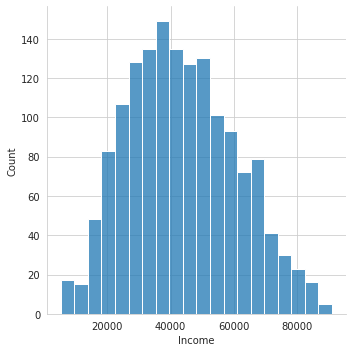

In [ ]:
sns.displot(df['Income'])
plt.show()

In [ ]:
df['Income'].fillna(value=df['Income'].median() ,inplace=True)

In [ ]:
df['Income'].describe()

count     1534.000000
mean     43562.040743
std      17130.157888
min       5305.000000
25%      30630.250000
50%      42344.000000
75%      55585.500000
max      90933.000000
Name: Income, dtype: float64

In [ ]:
df.isna().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
num_col_sel = ['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
       
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers  
Outliers_to_drop=detect_outliers(df,0,num_col_sel)

In [ ]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## EDA

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
print("Tanggal data terbaru:",max(dates))
print("Tanggal data terlama:",min(dates))

Tanggal data terbaru: 2014-12-06
Tanggal data terlama: 2012-01-08


In [ ]:
df['Year_Birth']=pd.DatetimeIndex(df['Year_Birth']).year
df['Year_Birth'].value_counts()

1976    66
1975    62
1971    59
1973    58
1974    56
1972    56
1978    53
1969    52
1970    50
1965    49
1966    39
1979    38
1977    37
1968    37
1956    36
1952    35
1955    35
1960    34
1967    33
1958    32
1983    30
1963    30
1986    30
1957    30
1959    30
1954    29
1981    29
1984    28
1964    28
1985    28
1982    27
1980    27
1961    25
1951    25
1962    25
1950    24
1989    23
1953    23
1987    19
1949    19
1988    18
1990    13
1948    11
1946     8
1992     8
1991     7
1947     7
1944     4
1945     4
1995     2
1996     2
1943     2
1994     1
1940     1
Name: Year_Birth, dtype: int64

In [ ]:
df['Age'] = 2020 - df['Year_Birth']
df['Age'].value_counts()

44    66
45    62
49    59
47    58
46    56
48    56
42    53
51    52
50    50
55    49
54    39
41    38
43    37
52    37
64    36
68    35
65    35
60    34
53    33
62    32
37    30
57    30
34    30
63    30
61    30
66    29
39    29
36    28
56    28
35    28
38    27
40    27
59    25
69    25
58    25
70    24
31    23
67    23
33    19
71    19
32    18
30    13
72    11
74     8
28     8
29     7
73     7
76     4
75     4
25     2
24     2
77     2
26     1
80     1
Name: Age, dtype: int64

In [ ]:
df['Income'].describe()

count     1534.000000
mean     43562.040743
std      17130.157888
min       5305.000000
25%      30630.250000
50%      42344.000000
75%      55585.500000
max      90933.000000
Name: Income, dtype: float64

In [ ]:
df["Marital_Status"].value_counts()

Married     598
Together    401
Single      327
Divorced    155
Widow        48
Alone         3
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

<Figure size 576x576 with 0 Axes>

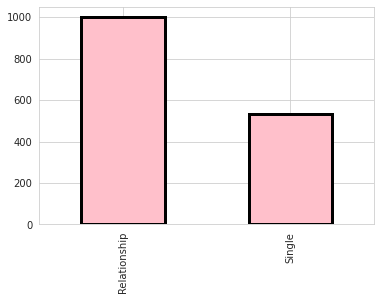

<Figure size 576x576 with 0 Axes>

In [ ]:
df['Marital_Status'].value_counts().plot(kind='bar',color = 'pink',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(8,8))

64.5% of pelanggan pada dataset ini sudah memiliki hubungan dan 35.5% lainnya masih berstatus sendiri

In [ ]:
df["Education"].value_counts()

Graduation    724
PhD           356
Master        268
2n Cycle      134
Basic          52
Name: Education, dtype: int64

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

<Figure size 576x576 with 0 Axes>

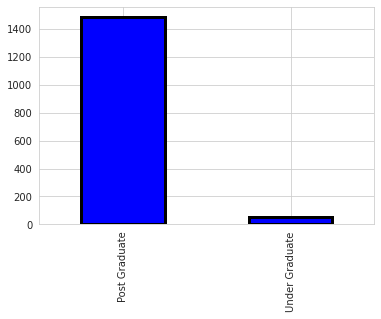

<Figure size 576x576 with 0 Axes>

In [ ]:
df['Education'].value_counts().plot(kind='bar',color = 'blue',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(8,8))

Sekitar 97.5% pelanggan yang sudah disurvei telah sarjana
 dan sekitar 2.5% lainnya belum menjadi sarjana

In [ ]:
df['Kidhome'].unique()

array([1, 0, 2])

In [ ]:
df['Teenhome'].unique()

array([1, 0, 2])

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['Children'].value_counts()

1    900
2    358
0    237
3     39
Name: Children, dtype: int64

<Figure size 576x576 with 0 Axes>

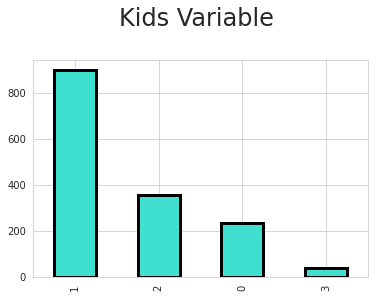

<Figure size 576x576 with 0 Axes>

In [ ]:
df['Children'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Kids Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [ ]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [ ]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [ ]:
df['TotalAcceptedCmp'].value_counts()

0    1308
1     183
2      31
3       9
4       3
Name: TotalAcceptedCmp, dtype: int64

<Figure size 576x576 with 0 Axes>

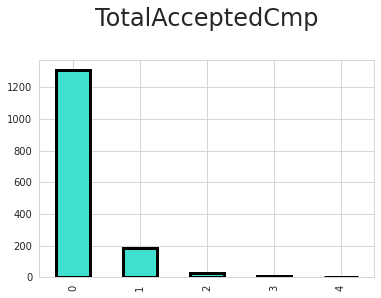

<Figure size 576x576 with 0 Axes>

In [ ]:
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("TotalAcceptedCmp\n",fontsize=24)
plt.figure(figsize=(8,8))

In [ ]:
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1)
df['TotalPurchases']

0        6
1       21
2        8
3       19
4       22
        ..
1529     4
1530     4
1531    19
1532    23
1533    11
Name: TotalPurchases, Length: 1534, dtype: int64

In [ ]:
df['Savings']=df['Income'] - df['Spent']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           1534 non-null   int64         
 1   Education            1534 non-null   object        
 2   Marital_Status       1534 non-null   object        
 3   Income               1534 non-null   float64       
 4   Kidhome              1534 non-null   int64         
 5   Teenhome             1534 non-null   int64         
 6   Dt_Customer          1534 non-null   datetime64[ns]
 7   Recency              1534 non-null   int64         
 8   Wines                1534 non-null   int64         
 9   Fruits               1534 non-null   int64         
 10  Meat                 1534 non-null   int64         
 11  Fish                 1534 non-null   int64         
 12  Sweets               1534 non-null   int64         
 13  Gold                 1534 non-nul

In [ ]:
df.drop(['Year_Birth' ,'Dt_Customer'] , axis=1 , inplace=True)

In [ ]:
#Melakukan Drop pada Marital Status dan Education karena bersifat Kategorik
df.drop(['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'], axis = 1, inplace=True)
df.drop(['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis = 1, inplace=True)
df.drop(['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], axis = 1 , inplace=True)
df.drop(['Kidhome', 'Teenhome'], axis = 1 , inplace=True)


In [ ]:
#Drop data Kategori yang sudah digabung
df_copy = df.copy()
df_copy.drop(['Marital_Status' ,'Education', 'Complain', 'Response'] , axis = 1 , inplace=True)
df_copy

,Income,Recency,Age,Children,Spent,TotalAcceptedCmp,TotalPurchases,Savings
0,46344.0,38,66,2,27,0,6,46317.0
1,71613.0,26,55,0,776,0,21,70837.0
2,26646.0,26,36,1,53,0,8,26593.0
3,58293.0,94,39,1,422,0,19,57871.0
4,62513.0,16,53,1,716,0,22,61797.0
...,...,...,...,...,...,...,...,...
1529,26816.0,50,34,0,22,0,4,26794.0
1530,34421.0,81,46,1,30,0,4,34391.0
1531,56981.0,91,39,0,1241,1,19,55740.0
1532,69245.0,8,64,1,843,0,23,68402.0


**Standarisasi Data Numerik**

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols =  [x for x in df_copy.columns if ~((df_copy[x].dtype != 'int64') & (df_copy[x].dtype != 'float64'))]
Scaler = StandardScaler()
df_copy[num_cols] = Scaler.fit_transform(df_copy[num_cols])

In [ ]:
df_copy

,Income,Recency,Age,Children,Spent,TotalAcceptedCmp,TotalPurchases,Savings
0,0.162454,-0.380491,1.359296,1.265740,-0.762146,-0.370312,-0.879651,0.182661
1,1.638053,-0.793322,0.387729,-1.643091,1.188360,-0.370312,1.347057,1.639376
2,-0.987823,-0.793322,-1.290433,-0.188676,-0.694438,-0.370312,-0.582757,-0.989127
3,0.860223,1.546052,-1.025460,-0.188676,0.266492,-0.370312,1.050163,0.869075
4,1.106653,-1.137347,0.211080,-0.188676,1.032111,-0.370312,1.495504,1.102316
...,...,...,...,...,...,...,...,...
1529,-0.977895,0.032339,-1.467082,-1.643091,-0.775166,-0.370312,-1.176546,-0.977185
1530,-0.533797,1.098818,-0.407190,-0.188676,-0.754333,-0.370312,-1.176546,-0.525853
1531,0.783608,1.442844,-1.025460,-1.643091,2.399288,1.629894,1.050163,0.742474
1532,1.499772,-1.412568,1.182647,-0.188676,1.362838,-0.370312,1.643951,1.494714


## Modeling

**PCA untuk Mereduksi Dimensi**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         1534 non-null   object 
 1   Marital_Status    1534 non-null   object 
 2   Income            1534 non-null   float64
 3   Recency           1534 non-null   int64  
 4   Complain          1534 non-null   int64  
 5   Response          1534 non-null   int64  
 6   Age               1534 non-null   int64  
 7   Children          1534 non-null   int64  
 8   Spent             1534 non-null   int64  
 9   TotalAcceptedCmp  1534 non-null   int64  
 10  TotalPurchases    1534 non-null   int64  
 11  Savings           1534 non-null   float64
dtypes: float64(2), int64(8), object(2)
memory usage: 143.9+ KB


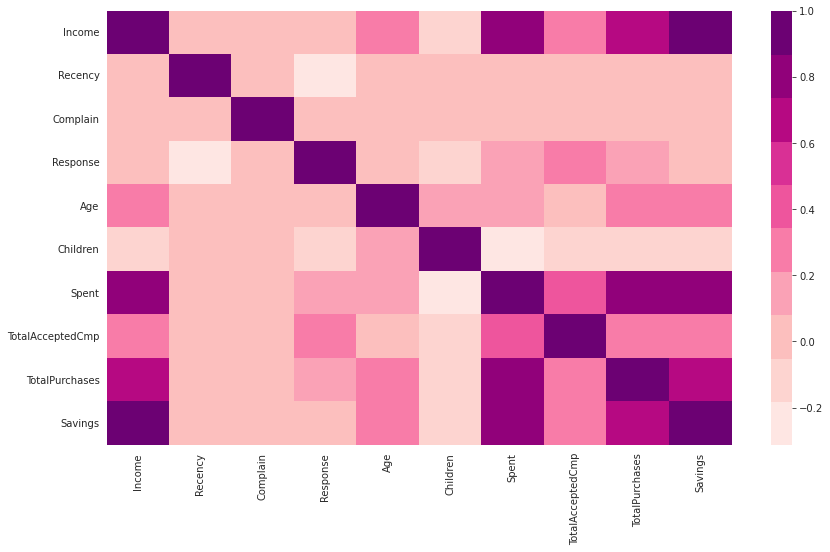

In [ ]:
#Melihat persebaran korelasi antara berbagai fitur dengan menggunakan heatmap
fig, ax = plt.subplots(figsize=(14,8))         
sns.heatmap(df.corr(),
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)

In [ ]:
#Melakukan PCA
pca = PCA(n_components = 0.75)
pca.fit(df_copy)
reduced_df= pd.DataFrame(pca.transform(df_copy))

print("Current number of features= ",len(reduced_df.columns))

Current number of features=  4


**Mencari Nilai klustering terbaik**

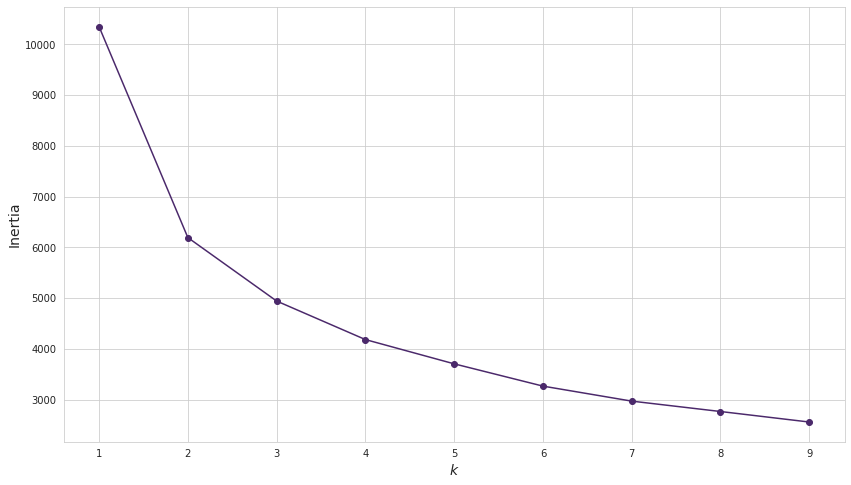

In [ ]:
plt.figure(figsize = (14,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-" ,color= colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

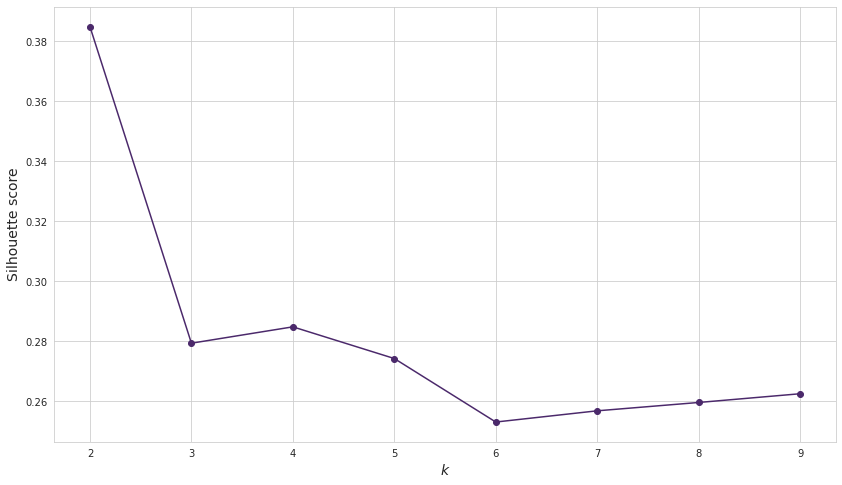

In [ ]:
plt.figure(figsize = (14,8) )
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(reduced_df, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-" ,color=colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

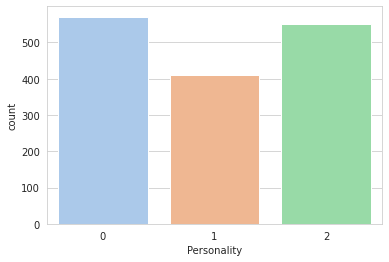

In [ ]:
clusters = KMeans(n_clusters=3, random_state=42).fit(reduced_df)
df["Personality"]= clusters.labels_
colors = sns.color_palette('pastel')[0:5]
sns.countplot(df['Personality'], palette=colors)

In [ ]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Age,Children,Spent,TotalAcceptedCmp,TotalPurchases,Savings,Personality
0,Post Graduate,Single,46344.0,38,0,0,66,2,27,0,6,46317.0,2
1,Post Graduate,Relationship,71613.0,26,0,0,55,0,776,0,21,70837.0,1
2,Post Graduate,Relationship,26646.0,26,0,0,36,1,53,0,8,26593.0,0
3,Post Graduate,Relationship,58293.0,94,0,0,39,1,422,0,19,57871.0,1
4,Post Graduate,Relationship,62513.0,16,0,0,53,1,716,0,22,61797.0,1


## Evaluation

Atribut yang di evaluasi:
1. Umur
2. Jumlah anak
3. Income
4. Pengeluaran(Spending)
5. Status Pernikahan
6. Edukasi

In [ ]:
df['Personality'].value_counts()

0    571
2    552
1    411
Name: Personality, dtype: int64

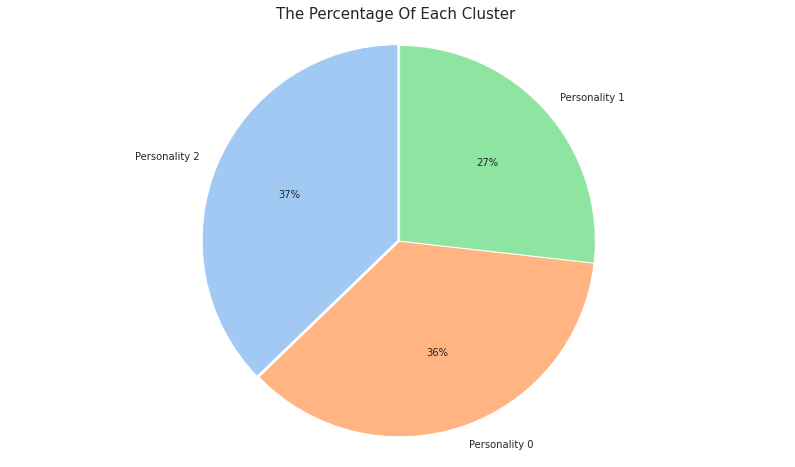

In [ ]:
# Perbandingan antar cluster Personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8) )
plt.pie(list(df['Personality'].value_counts()),labels=['Personality 2', 'Personality 0', 'Personality 1'],autopct='%.00f%%', startangle=90, explode =(0.01,0,0), colors=colors)
plt.title('The Percentage Of Each Cluster ' ,fontsize = 15)
plt.axis('equal')
plt.show()

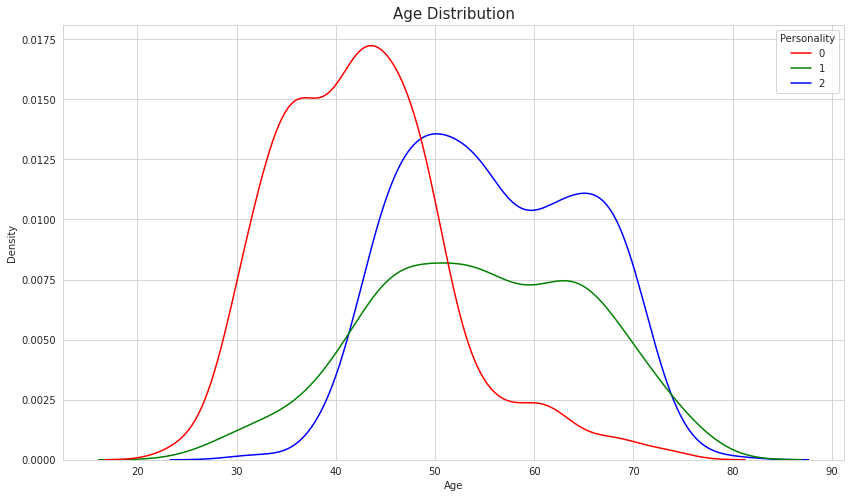

In [ ]:
# Perbandingan umur antar personality
hue_colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Age' , hue = 'Personality', palette=hue_colors)
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [ ]:
# Rasio umur pada tiap cluster personality > 45
k0 = df[(df['Age'] > 45 )&(df['Personality'] == 0)]
k1 = df[(df['Age'] > 45 )&(df['Personality'] == 1)]
k2 = df[(df['Age'] > 45 )&(df['Personality'] == 2)]
print('percentage of customer more than 45 at K0 : {0:0.2f}%'.format(len(k0) / len(df[df['Personality'] == 0])))
print('percentage of customer more than 45 at K1 : {0:0.2f}%'.format(len(k1) / len(df[df['Personality'] == 1])))
print('percentage of customer more than 45 at K2 : {0:0.2f}%'.format(len(k2) / len(df[df['Personality'] == 2])))

percentage of customer more than 45 at K0 : 0.34%
percentage of customer more than 45 at K1 : 0.77%
percentage of customer more than 45 at K2 : 0.86%


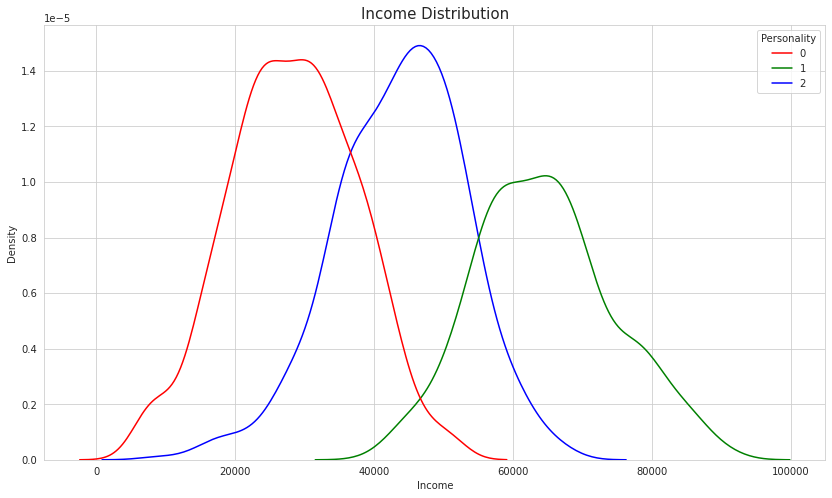

In [ ]:
# Perbandingan income antar personality
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Income' , hue = 'Personality', palette=hue_colors)
plt.title('Income Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
0,571.0,28341.461471,9159.971430,5305.0,22115.5,28389.0,34733.0,51381.5
1,411.0,64491.565693,9939.261969,40464.0,57354.0,63972.0,70483.0,90933.0
2,552.0,43723.120471,9448.069655,8820.0,37274.0,44462.0,50439.5,68274.0


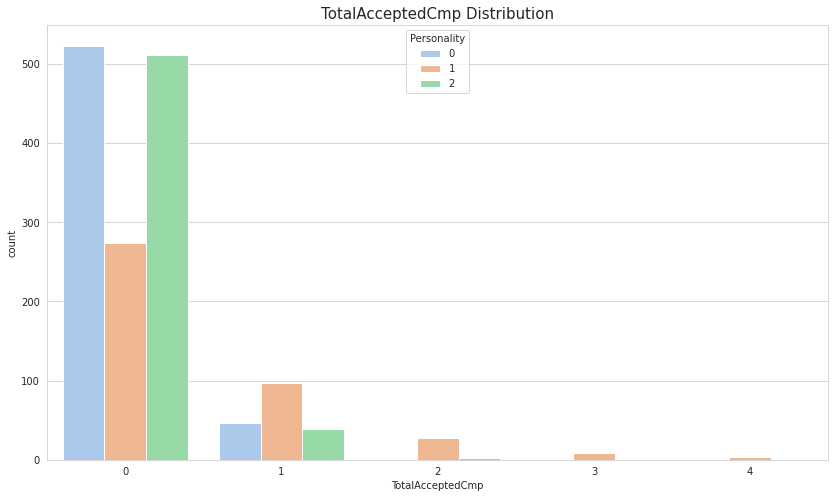

In [ ]:
# Perbandingan kampanye diterima antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'TotalAcceptedCmp' , hue = 'Personality', palette=colors)
plt.title('TotalAcceptedCmp Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['TotalAcceptedCmp'].value_counts()

Personality  TotalAcceptedCmp
0            0                   523
             1                    47
             2                     1
1            0                   274
             1                    97
             2                    28
             3                     9
             4                     3
2            0                   511
             1                    39
             2                     2
Name: TotalAcceptedCmp, dtype: int64

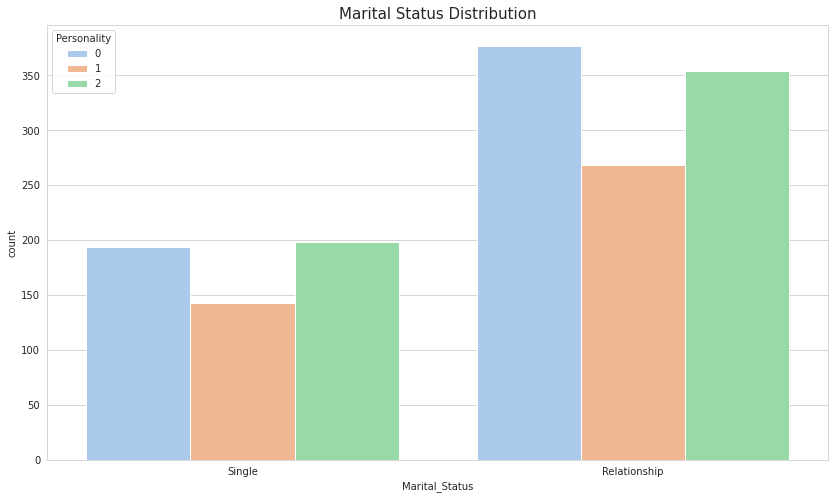

In [ ]:
# Perbandingan status pernikahan antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Marital_Status' , hue = 'Personality', palette=colors)
plt.title('Marital Status Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['Marital_Status'].value_counts()

Personality  Marital_Status
0            Relationship      377
             Single            194
1            Relationship      268
             Single            143
2            Relationship      354
             Single            198
Name: Marital_Status, dtype: int64

In [ ]:
k0_S = len(df[(df['Marital_Status'] == 'Single') &(df['Personality'] == 0)]) / len(df)
k0_R = len(df[(df['Marital_Status'] == 'Relationship') &(df['Personality'] == 0)]) / len(df)
k1_S = len(df[(df['Marital_Status'] == 'Single') &(df['Personality'] == 1)]) / len(df)
k1_R = len(df[(df['Marital_Status'] == 'Relationship') &(df['Personality'] == 1)]) / len(df)
k2_S = len(df[(df['Marital_Status'] == 'Single') &(df['Personality'] == 2)]) / len(df)
k2_R = len(df[(df['Marital_Status'] == 'Relationship') &(df['Personality'] == 2)]) / len(df)
print('Probability of Marital Status Single at K0 is {0:0.2f}%'.format(k0_S))
print('Probability of Marital Status Single at K1 is {0:0.2f}%'.format(k1_S))
print('Probability of Marital Status Single at K2 is {0:0.2f}%'.format(k2_S))
print('Probability of Marital Status Relationship at K0 is {0:0.2f}%'.format(k0_R))
print('Probability of Marital Status Relationship at K1 is {0:0.2f}%'.format(k1_R))
print('Probability of Marital Status Relationship at K2 is {0:0.2f}%'.format(k2_R))

Probability of Marital Status Single at K0 is 0.13%
Probability of Marital Status Single at K1 is 0.09%
Probability of Marital Status Single at K2 is 0.13%
Probability of Marital Status Relationship at K0 is 0.25%
Probability of Marital Status Relationship at K1 is 0.17%
Probability of Marital Status Relationship at K2 is 0.23%


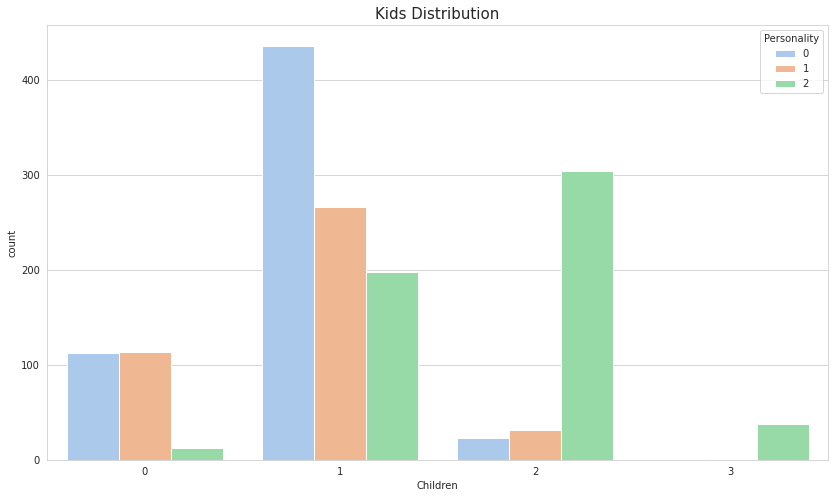

In [ ]:
# Perbandingan anak antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Children' , hue = 'Personality', palette=colors)
plt.title('Kids Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['Children'].value_counts()

Personality  Children
0            1           436
             0           112
             2            23
1            1           266
             0           113
             2            31
             3             1
2            2           304
             1           198
             3            38
             0            12
Name: Children, dtype: int64

In [ ]:
k0 = len(df[(df['Children'] > 0) &(df['Personality'] == 0)]) / len(df)
k1 = len(df[(df['Children'] > 0) &(df['Personality'] == 1)]) / len(df)
k2 = len(df[(df['Children'] > 0) &(df['Personality'] == 2)]) / len(df)
print('Probability of having children at K0 is {0:0.2f}%'.format(k0))
print('Probability of having children at K1 is {0:0.2f}%'.format(k1))
print('Probability of having children at K2 is {0:0.2f}%'.format(k2))

Probability of having children at K0 is 0.30%
Probability of having children at K1 is 0.19%
Probability of having children at K2 is 0.35%


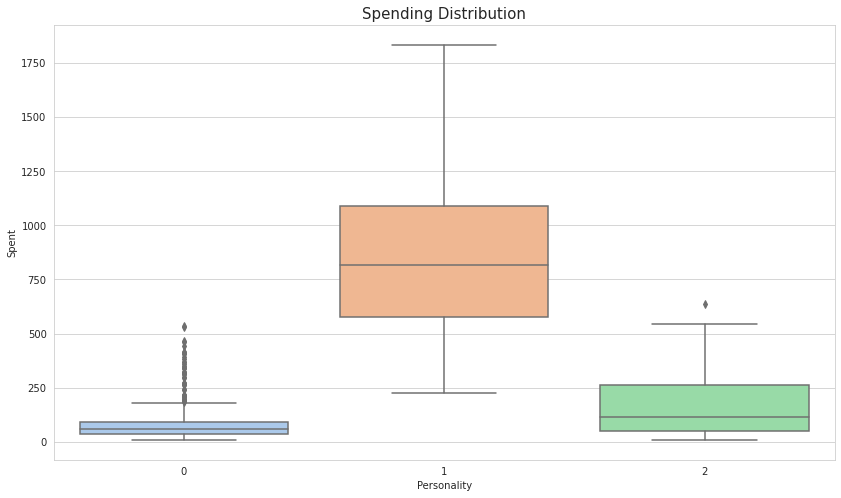

In [ ]:
# Perbandingan pengeluaran antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8))
sns.boxplot(data =df, x = 'Personality' , y = 'Spent' ,palette=colors)
plt.title('Spending Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['Spent'].describe()

,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
0,571.0,83.222417,84.499961,10.0,34.00,57.0,92.5,534.0
1,411.0,859.289538,338.790764,227.0,577.50,819.0,1091.5,1835.0
2,552.0,162.463768,133.552217,8.0,48.75,116.5,263.0,637.0


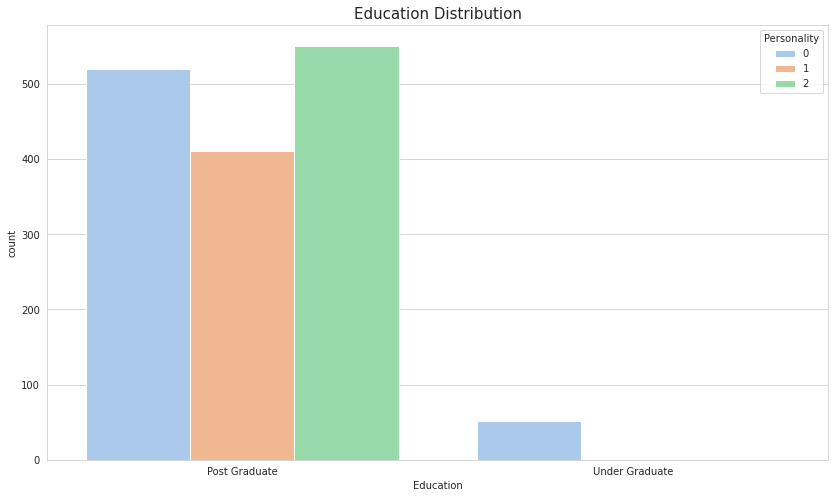

In [ ]:
# Perbandingan status pernikahan antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Education' , hue = 'Personality', palette=colors)
plt.title('Education Distribution' ,fontsize = 15)
plt.show()

In [ ]:
df.groupby(['Personality'])['Education'].value_counts()

Personality  Education     
0            Post Graduate     520
             Under Graduate     51
1            Post Graduate     411
2            Post Graduate     551
             Under Graduate      1
Name: Education, dtype: int64

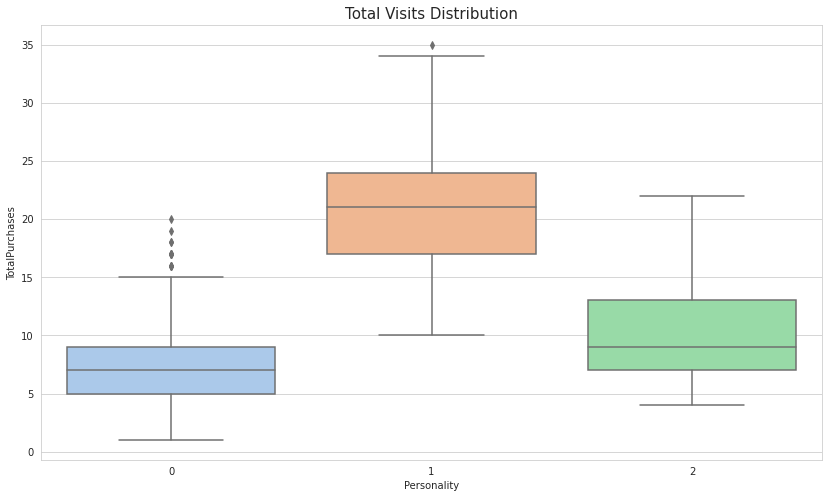

In [ ]:
# Perbandingan total purchases antar personality
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (14,8))
sns.boxplot(data =df, x = 'Personality' , y = 'TotalPurchases' ,palette=colors)
plt.title('Total Visits Distribution' ,fontsize = 15)
plt.show()

In [ ]:
k0_PG = len(df[(df['Education'] == 'Post Graduate') &(df['Personality'] == 0)]) / len(df)
k0_UG = len(df[(df['Education'] == 'Under Graduate') &(df['Personality'] == 0)]) / len(df)
k1_PG = len(df[(df['Education'] == 'Post Graduate') &(df['Personality'] == 1)]) / len(df)
k1_UG = len(df[(df['Education'] == 'Under Graduate') &(df['Personality'] == 1)]) / len(df)
k2_PG = len(df[(df['Education'] == 'Post Graduate') &(df['Personality'] == 2)]) / len(df)
k2_UG = len(df[(df['Education'] == 'Under Graduate') &(df['Personality'] == 2)]) / len(df)
print('Probability of Education Post Graduate at K0 is {0:0.2f}%'.format(k0_PG))
print('Probability of Education Post Graduate at K1 is {0:0.2f}%'.format(k1_PG))
print('Probability of Education Post Graduatee at K2 is {0:0.2f}%'.format(k2_PG))
print('Probability of Education Under Graduate at K0 is {0:0.2f}%'.format(k0_UG))
print('Probability of Education Under Graduate at K1 is {0:0.2f}%'.format(k1_UG))
print('Probability of Education Under Graduate at K2 is {0:0.2f}%'.format(k2_UG))

Probability of Education Post Graduate at K0 is 0.34%
Probability of Education Post Graduate at K1 is 0.27%
Probability of Education Post Graduatee at K2 is 0.36%
Probability of Education Under Graduate at K0 is 0.03%
Probability of Education Under Graduate at K1 is 0.00%
Probability of Education Under Graduate at K2 is 0.00%


Yang Perlu DItanyakan:
1. 2n Cycle dan Graduation masuk mana
2. jumlah cluster
3. webpurchase apakah dimasukin